In [ ]:
# aymericdamien example

In [36]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [37]:
#Parameters

learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [38]:
# Training Data

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [39]:
#tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

#Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [40]:
# Construct a linear model

pred = tf.add(tf.multiply(X,W), b)

In [41]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

#Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [42]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.100238800 W= 0.334976 b= 0.187229
Epoch: 0100 cost= 0.097548552 W= 0.329898 b= 0.223761
Epoch: 0150 cost= 0.095169231 W= 0.325122 b= 0.25812
Epoch: 0200 cost= 0.093064949 W= 0.32063 b= 0.290435
Epoch: 0250 cost= 0.091203824 W= 0.316405 b= 0.320829
Epoch: 0300 cost= 0.089557894 W= 0.312432 b= 0.349415
Epoch: 0350 cost= 0.088102244 W= 0.308694 b= 0.3763
Epoch: 0400 cost= 0.086814910 W= 0.305179 b= 0.401587
Epoch: 0450 cost= 0.085676461 W= 0.301873 b= 0.425369
Epoch: 0500 cost= 0.084669650 W= 0.298764 b= 0.447737
Epoch: 0550 cost= 0.083779283 W= 0.29584 b= 0.468776
Epoch: 0600 cost= 0.082991987 W= 0.293089 b= 0.488562
Epoch: 0650 cost= 0.082295746 W= 0.290502 b= 0.507172
Epoch: 0700 cost= 0.081680074 W= 0.288069 b= 0.524675
Epoch: 0750 cost= 0.081135690 W= 0.285781 b= 0.541136
Epoch: 0800 cost= 0.080654263 W= 0.283629 b= 0.55662
Epoch: 0850 cost= 0.080228575 W= 0.281604 b= 0.571183
Epoch: 0900 cost= 0.079852201 W= 0.2797 b= 0.58488
Epoch: 0950 cost= 0.079519421 W= 0.27

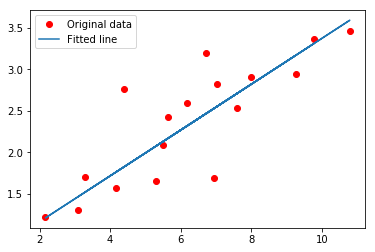

In [43]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()